In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [455]:
# Cleaned dataset
path = r'C:\Users\Tesla Laptops\Desktop\Job planning\Portfolio Project\TNO - Crimes in London\data\raw\M1045_MonthlyCrimeDashboard_TNOCrimeData_cleaned.csv'

In [457]:
df = pd.read_csv(path, parse_dates=['Month_Year', 'Refresh Date'])

In [458]:
df.head()

,Month_Year,Area Type,Borough_SNT,Area name,Area code,Offence Group,Offence Subgroup,Measure,Financial Year,FY_FYIndex,Count,Refresh Date
0,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,BURGLARY,BURGLARY - BUSINESS AND COMMUNITY,Positive Outcomes,fy21-22,21-22_01,1,2025-06-05
1,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,BURGLARY,BURGLARY - RESIDENTIAL,Positive Outcomes,fy21-22,21-22_01,2,2025-06-05
2,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,ARSON AND CRIMINAL DAMAGE,CRIMINAL DAMAGE,Positive Outcomes,fy21-22,21-22_01,13,2025-06-05
3,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,DRUG OFFENCES,TRAFFICKING OF DRUGS,Positive Outcomes,fy21-22,21-22_01,5,2025-06-05
4,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,PUBLIC ORDER OFFENCES,OTHER OFFENCES PUBLIC ORDER,Offences,fy21-22,21-22_01,14,2025-06-05


In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791224 entries, 0 to 791223
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Month_Year        791224 non-null  datetime64[ns]
 1   Area Type         791224 non-null  object        
 2   Borough_SNT       791224 non-null  object        
 3   Area name         791224 non-null  object        
 4   Area code         788005 non-null  object        
 5   Offence Group     791224 non-null  object        
 6   Offence Subgroup  791224 non-null  object        
 7   Measure           791224 non-null  object        
 8   Financial Year    791224 non-null  object        
 9   FY_FYIndex        791224 non-null  object        
 10  Count             791224 non-null  int64         
 11  Refresh Date      791224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 72.4+ MB


In [463]:
df.columns

Index(['Month_Year', 'Area Type', 'Borough_SNT', 'Area name', 'Area code',
       'Offence Group', 'Offence Subgroup', 'Measure', 'Financial Year',
       'FY_FYIndex', 'Count', 'Refresh Date'],
      dtype='object')

In [465]:
df.dtypes

Month_Year          datetime64[ns]
Area Type                   object
Borough_SNT                 object
Area name                   object
Area code                   object
Offence Group               object
Offence Subgroup            object
Measure                     object
Financial Year              object
FY_FYIndex                  object
Count                        int64
Refresh Date        datetime64[ns]
dtype: object

In [467]:
# Extracting Day, Month and Year from Month_Year Column
df['Year'] = df['Month_Year'].dt.year
df['Month'] = df['Month_Year'].dt.month
df['day'] = df['Month_Year'].dt.day

df['month_name'] = df['Month_Year'].dt.strftime('%b') # e.g., "Jun"
df['month_year_label'] = df['Month_Year'].dt.strftime('%b %Y') # e.g., "Jun 2021"

In [468]:
df.head()

,Month_Year,Area Type,Borough_SNT,Area name,Area code,Offence Group,Offence Subgroup,Measure,Financial Year,FY_FYIndex,Count,Refresh Date,Year,Month,day,month_name,month_year_label
0,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,BURGLARY,BURGLARY - BUSINESS AND COMMUNITY,Positive Outcomes,fy21-22,21-22_01,1,2025-06-05,2021,6,1,Jun,Jun 2021
1,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,BURGLARY,BURGLARY - RESIDENTIAL,Positive Outcomes,fy21-22,21-22_01,2,2025-06-05,2021,6,1,Jun,Jun 2021
2,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,ARSON AND CRIMINAL DAMAGE,CRIMINAL DAMAGE,Positive Outcomes,fy21-22,21-22_01,13,2025-06-05,2021,6,1,Jun,Jun 2021
3,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,DRUG OFFENCES,TRAFFICKING OF DRUGS,Positive Outcomes,fy21-22,21-22_01,5,2025-06-05,2021,6,1,Jun,Jun 2021
4,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,PUBLIC ORDER OFFENCES,OTHER OFFENCES PUBLIC ORDER,Offences,fy21-22,21-22_01,14,2025-06-05,2021,6,1,Jun,Jun 2021


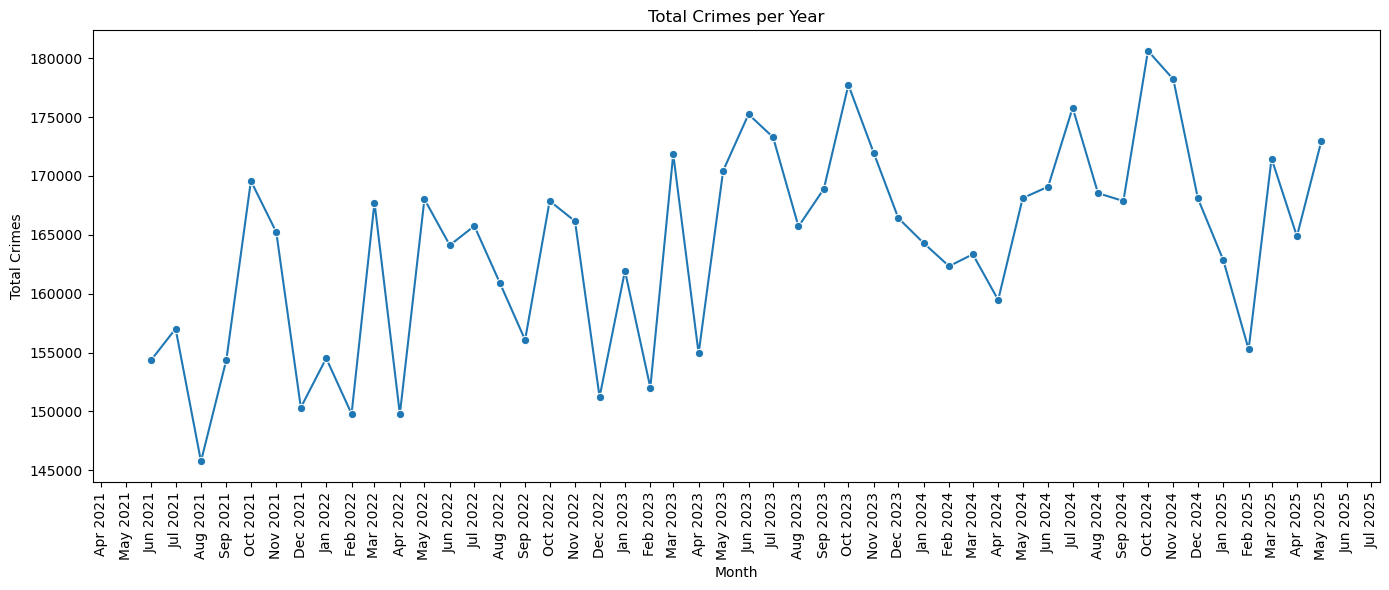

In [469]:
# Count of offences per year

import matplotlib.dates as mdates

monthly = df.groupby('Month_Year')['Count'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly, x='Month_Year', y='Count', marker='o')
plt.title("Total Crimes per Year")
plt.xlabel("Month")
plt.ylabel("Total Crimes")
plt.xticks(rotation=90)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.tight_layout()
plt.show()

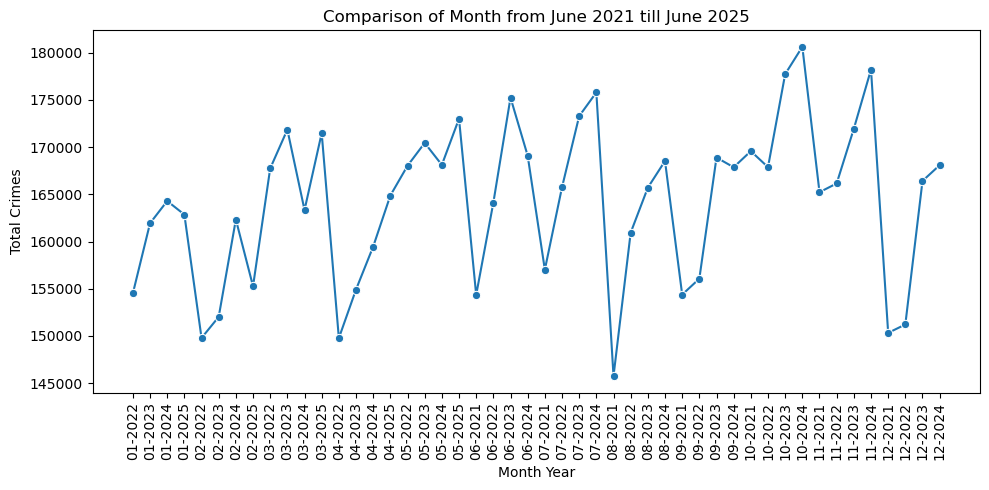

In [22]:
## From above graph, Total Crimes are increasing every year

In [ ]:
# Above graph Comparing Total Crimes of respective months in 4 years

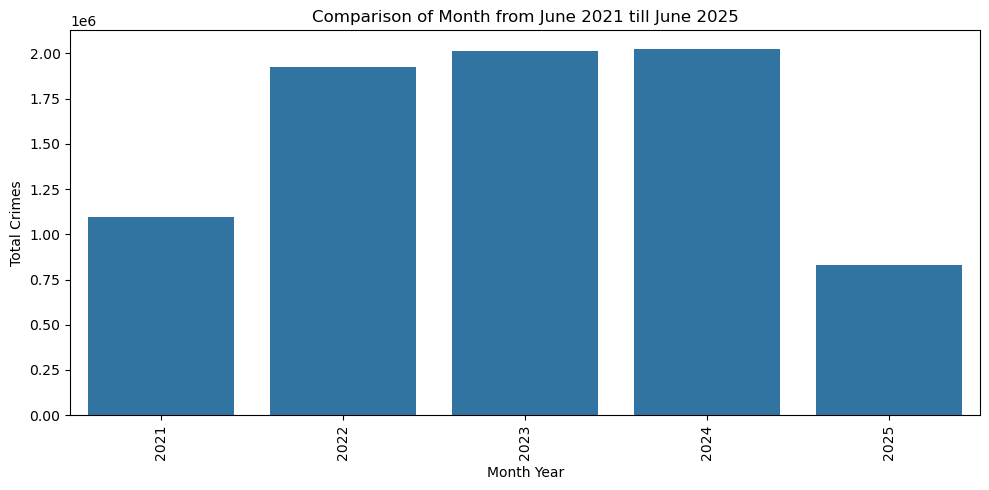

In [57]:
df['year_label'] = df['Month_Year'].dt.strftime('%Y')
Total_crimes_per_year = df.groupby('year_label')['Count'].sum().reset_index()

# monthly_by_label

plt.figure(figsize = (10, 5))
sns.barplot(data=Total_crimes_per_year, x='year_label', y='Count')
plt.title('Comparison of Month from June 2021 till June 2025')
plt.xlabel('Month Year')
plt.ylabel('Total Crimes')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
# Data starts from April 2021 and till June 2025, showing low values in those two years

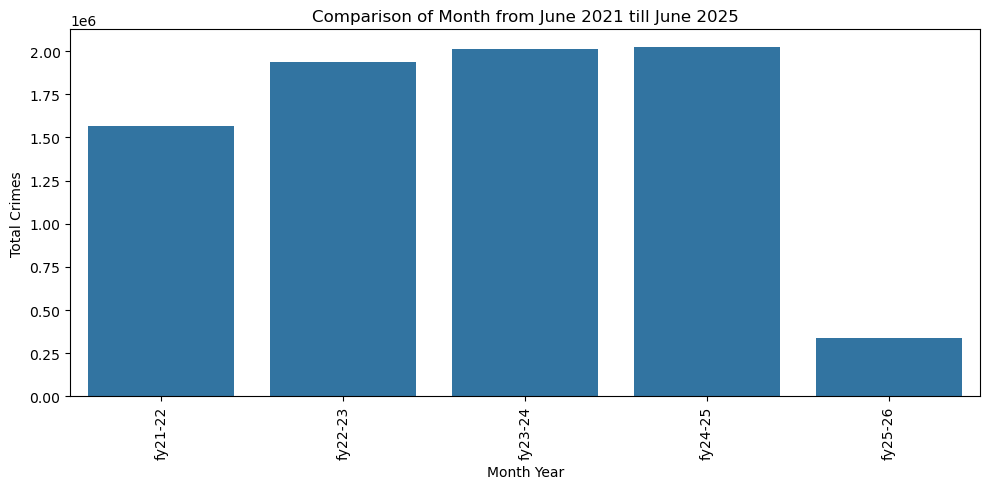

In [59]:
# df['year_label'] = df['Month_Year'].dt.strftime('%Y')
Total_crimes_per_year = df.groupby('Financial Year')['Count'].sum().reset_index()

# monthly_by_label

plt.figure(figsize = (10, 5))
sns.barplot(data=Total_crimes_per_year, x='Financial Ya', y='Count')
plt.title('Comparison of Month from June 2021 till June 2025')
plt.xlabel('Month Year')
plt.ylabel('Total Crimes')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
## In above graph, fiscal year starts from April but fy21-22 missing two months data and 2025 start april.
## comparing middle three graph shows increase in Total Crime

In [ ]:
#

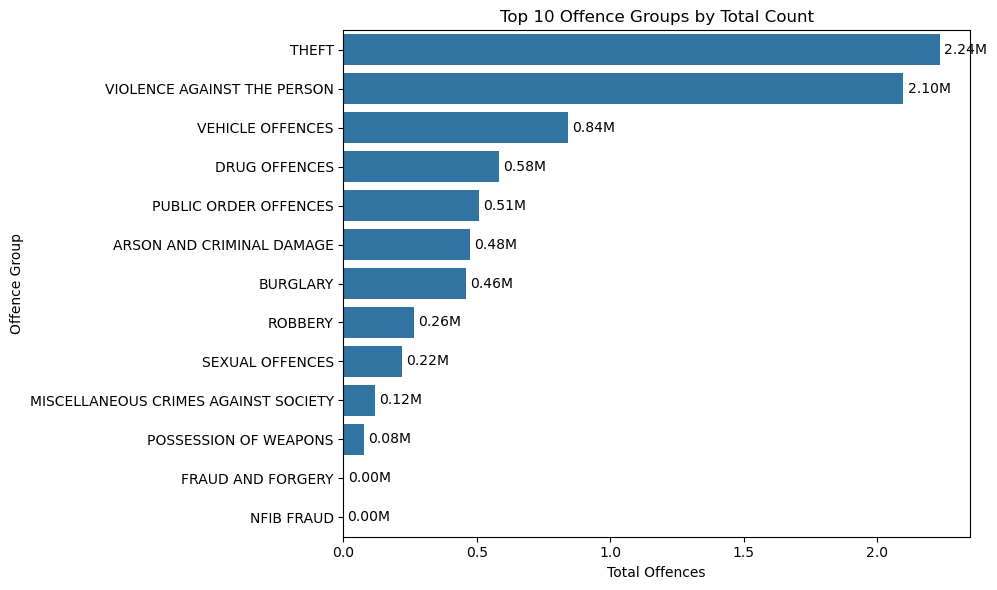

In [108]:
top_offences = df.groupby('Offence Group')['Count'].sum().sort_values(ascending=False).reset_index()

# Convert Count to Millions
top_offences['Count_M'] = top_offences['Count'] / 1000000

plt.figure(figsize=(10,6))
barplot = sns.barplot(data=top_offences, x='Count_M', y='Offence Group')

# Add values on top of each bar
for bar in barplot.containers:
    barplot.bar_label(bar, fmt='%0.2fM', label_type='edge', padding=3)
    
plt.title('Top 10 Offence Groups by Total Count')
plt.xlabel('Total Offences')
plt.ylabel('Offence Group')
plt.tight_layout()
plt.show()


In [475]:
# Top 10 Areas with Most Crimes

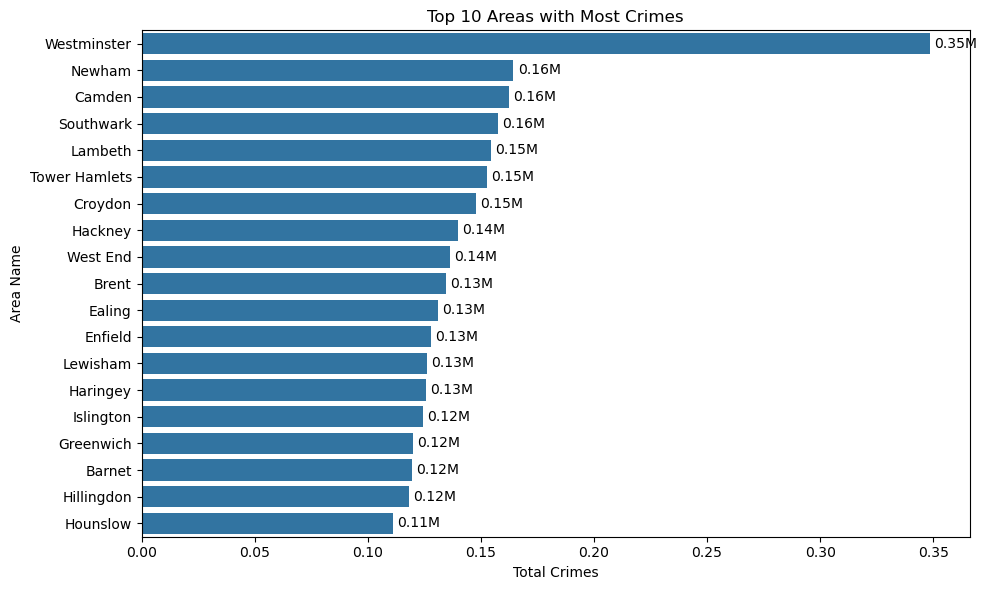

In [477]:
top_areas = (df.groupby('Area name')['Count'].sum().sort_values(ascending=False).iloc[1:20].reset_index())



top_areas['Count_M'] = top_areas['Count']/1000000

plt.figure(figsize=(10,6))
barplot = sns.barplot(data=top_areas, x='Count_M', y='Area name')


for bar in barplot.containers:
    barplot.bar_label(bar, fmt='%0.2fM', label_type='edge', padding=3)
    

plt.title('Top 10 Areas with Most Crimes')
plt.xlabel('Total Crimes')
plt.ylabel('Area Name')
plt.tight_layout()
plt.show()


In [114]:
top_areas

Index(['Other / NK', 'Westminster', 'Newham', 'Camden', 'Southwark', 'Lambeth',
       'Tower Hamlets', 'Croydon', 'Hackney', 'West End'],
      dtype='object', name='Area name')

In [ ]:
# Heat Map of Offence Group of Top 10 Areas

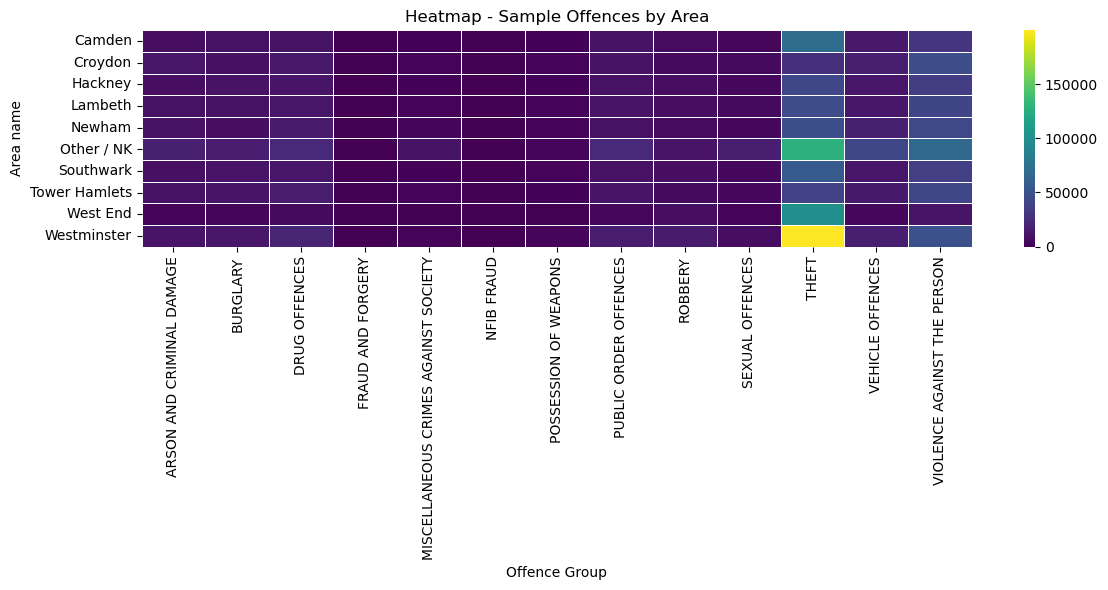

In [166]:
top_areas = df.groupby('Area name')['Count'].sum().sort_values(ascending=False).head(10).index
sample_df = df[df['Area name'].isin(top_areas)]

pivot_sample = sample_df.pivot_table(index='Area name', columns='Offence Group', values='Count', aggfunc='sum').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_sample, cmap='viridis', linewidths=0.5)
plt.title('Heatmap - Sample Offences by Area')
plt.tight_layout()
plt.show()

# Line graph of each Offence Group

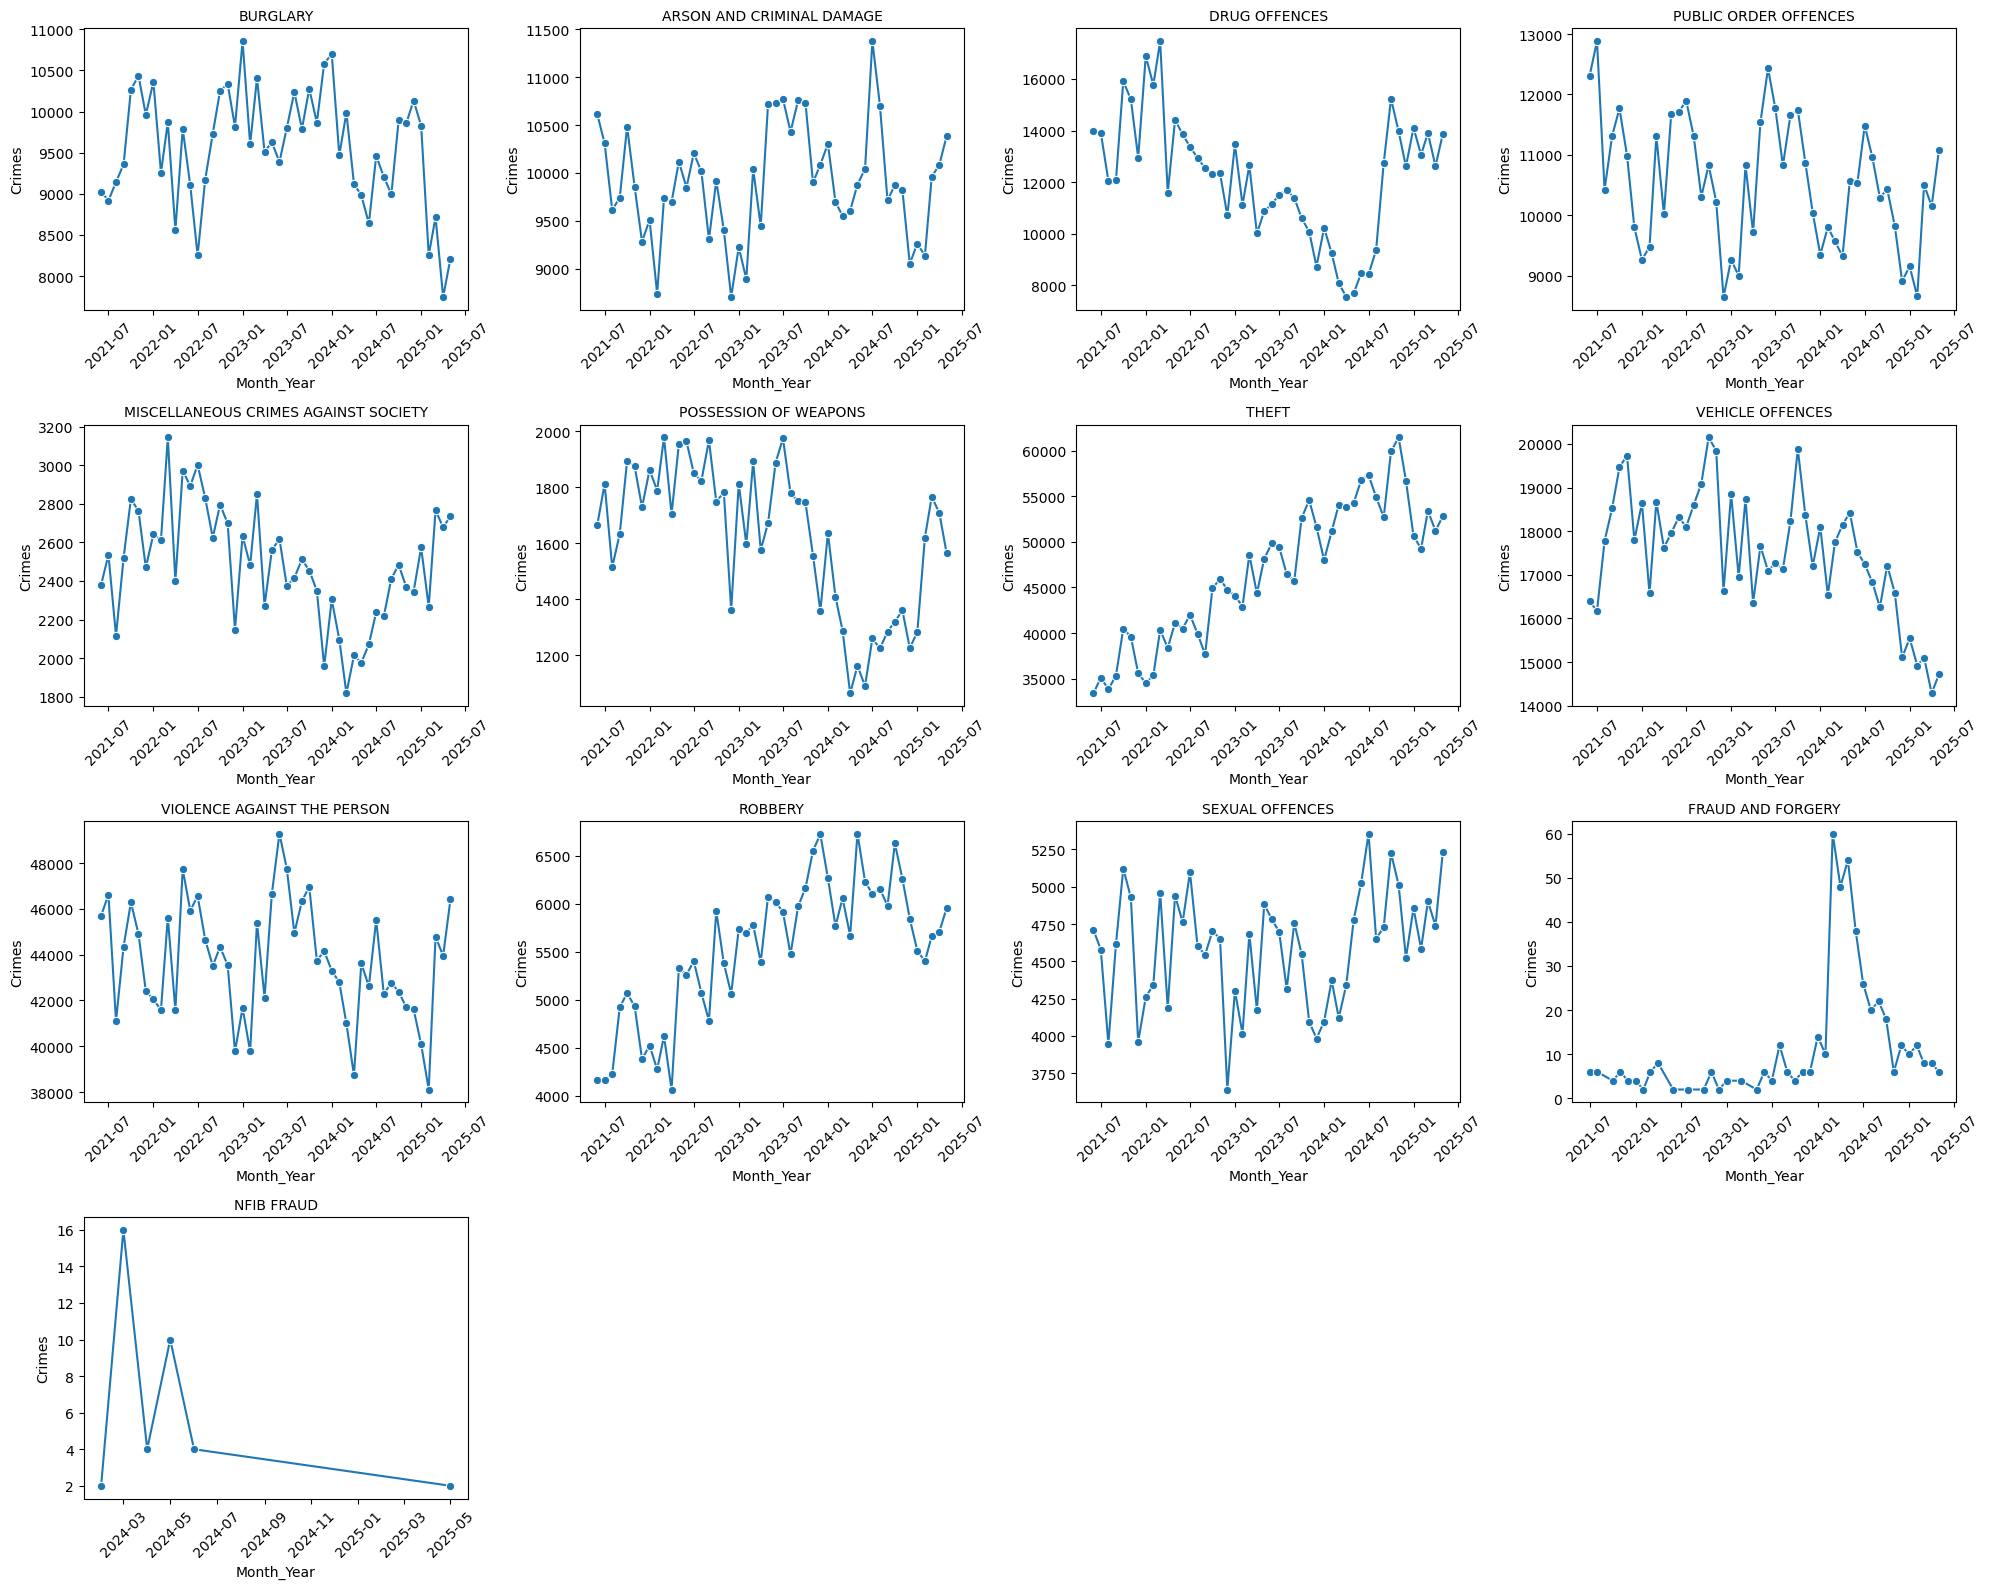

In [480]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Step 1: Get all offence groups
offence_groups = df['Offence Group'].unique()
n = len(offence_groups)

# Step 2: Grid size - 4 columns
cols = 4
rows = math.ceil(n / cols)

# Step 3: Create grid of subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 4 * rows), sharex=False)
axes = axes.flatten()  # Make 1D for easy indexing

# Step 4: Loop and plot
for i, group in enumerate(offence_groups):
    subset = df[df['Offence Group'] == group]
    monthly = subset.groupby('Month_Year')['Count'].sum().reset_index()

    sns.lineplot(ax=axes[i], data=monthly, x='Month_Year', y='Count', marker='o')
    axes[i].set_title(f'{group}', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('Crimes')

# Step 5: Remove unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [481]:
df.columns

Index(['Month_Year', 'Area Type', 'Borough_SNT', 'Area name', 'Area code',
       'Offence Group', 'Offence Subgroup', 'Measure', 'Financial Year',
       'FY_FYIndex', 'Count', 'Refresh Date', 'Year', 'Month', 'day',
       'month_name', 'month_year_label'],
      dtype='object')

In [484]:
# Bar plot of Measure
# Measure Contain Two Categories -- Offence=Crime Recorded, Positive Outcome=Any outcome of Offence recorded

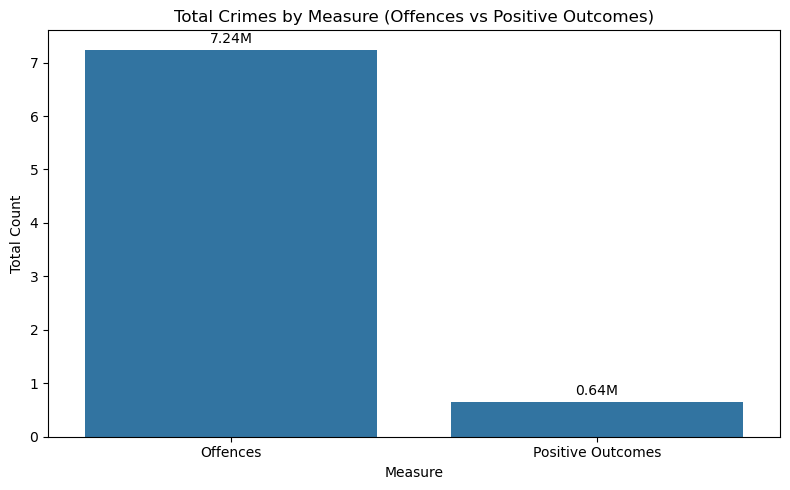

In [283]:
# Step 1: Aggregate total counts by 'Measure'
measure_counts = df.groupby('Measure')['Count'].sum().reset_index()

measure_counts['Count'] = measure_counts['Count']/1000000

# Step 2: Create barplot
plt.figure(figsize=(8, 5))
barplot = sns.barplot(data=measure_counts, x='Measure', y='Count')

# Step 3: Add values on top of each bar
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2fM', label_type='edge', padding=3)

# Step 4: Final formatting
plt.title('Total Crimes by Measure (Offences vs Positive Outcomes)')
plt.ylabel('Total Count')
plt.xlabel('Measure')
plt.tight_layout()
plt.show()


In [486]:
# Offences vs Positive Outcomes by Crime Type

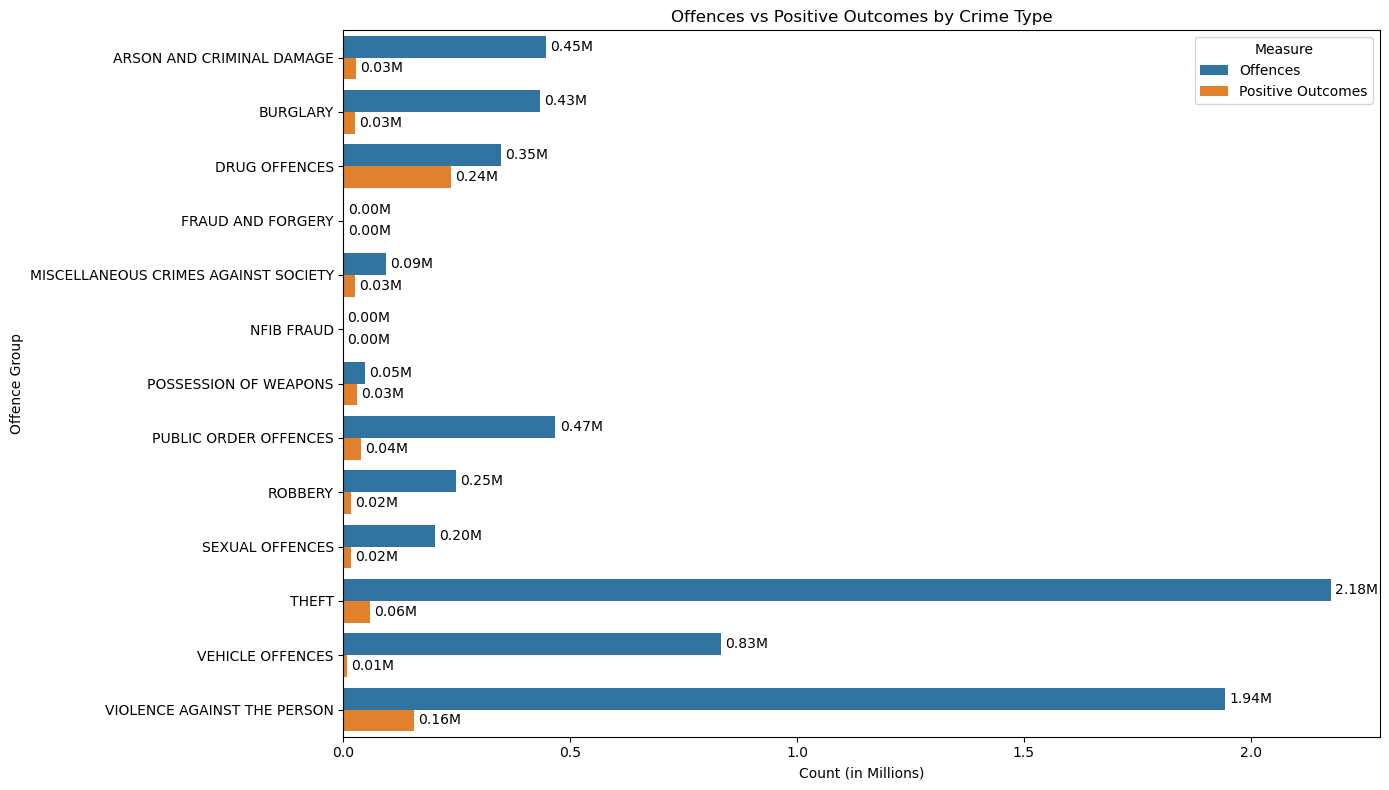

In [488]:
# Step 1: Filter and group data
offences = df[df['Measure'] == 'Offences'].groupby('Offence Group')['Count'].sum()
positives = df[df['Measure'] == 'Positive Outcomes'].groupby('Offence Group')['Count'].sum()

# Step 2: Combine into a single DataFrame
combined = pd.concat([offences, positives], axis=1)
combined.columns = ['Offences', 'Positive Outcomes']
combined = combined.fillna(0)  # in case any group has no outcomes

# Step 3: Convert to millions
combined = combined / 1_000_000

# Step 4: Reset index for plotting
combined = combined.reset_index()

# Step 5: Melt DataFrame to long format for seaborn
melted = combined.melt(id_vars='Offence Group', value_vars=['Offences', 'Positive Outcomes'],
                       var_name='Measure', value_name='Count')

# Step 6: Plot grouped bar chart
plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=melted, x='Count', y='Offence Group', hue='Measure')

# Add values on bars
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2fM', padding=3)

plt.title('Offences vs Positive Outcomes by Crime Type')
plt.xlabel('Count (in Millions)')
plt.ylabel('Offence Group')
plt.legend(title='Measure')
plt.tight_layout()
plt.show()


In [490]:
# Offences vs Positive Outcomes by Area

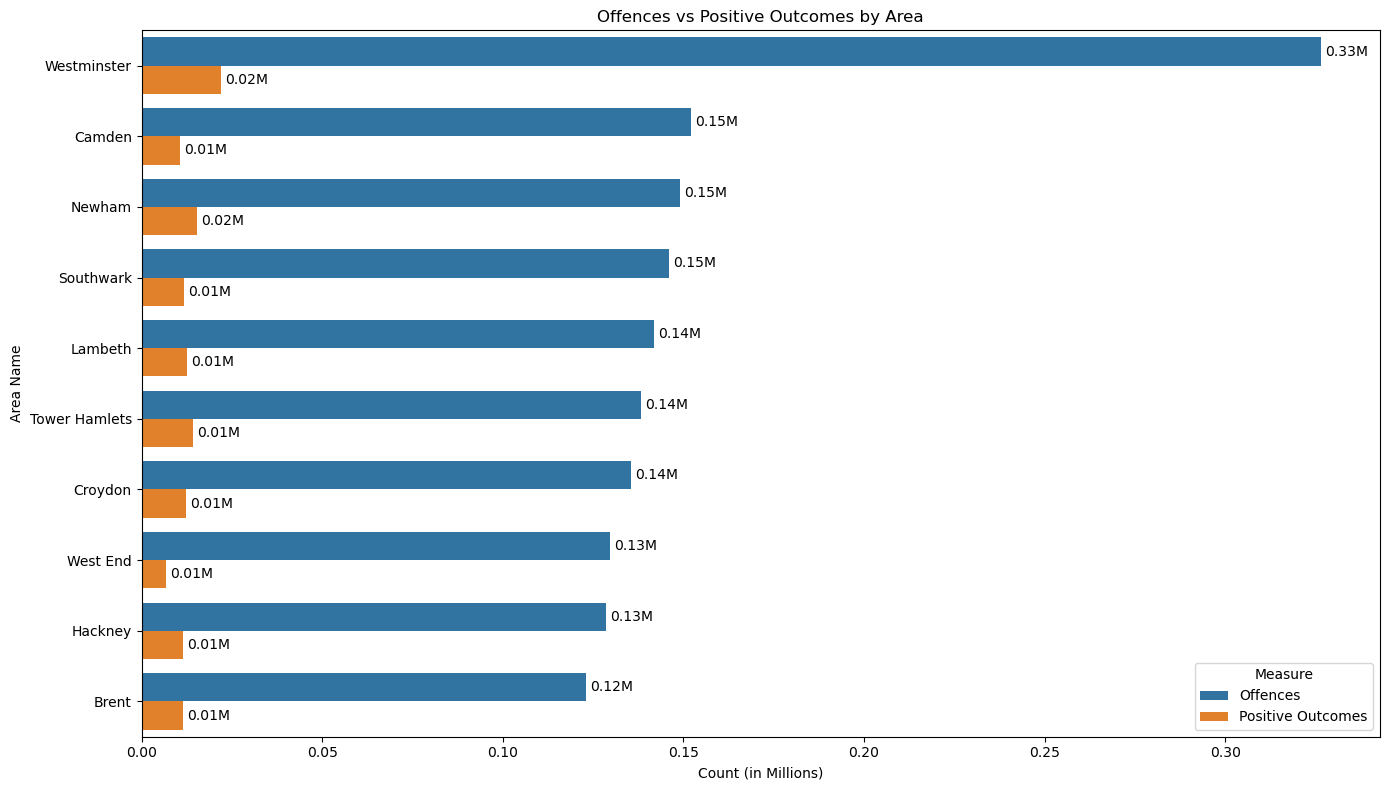

In [492]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Filter and group data by Area name
offences = df[df['Measure'] == 'Offences'].groupby('Area name')['Count'].sum()
positives = df[df['Measure'] == 'Positive Outcomes'].groupby('Area name')['Count'].sum()

# Step 2: Combine into a single DataFrame
combined = pd.concat([offences, positives], axis=1)
combined.columns = ['Offences', 'Positive Outcomes']
combined = combined.fillna(0)

# Step 3: Convert to millions
combined = combined / 1000000

# Optional: Sort by total offences to show top areas
combined = combined.sort_values('Offences', ascending=False).iloc[1:11]  # Top 15 areas

# Step 4: Reset index for plotting
combined = combined.reset_index()

# Step 5: Melt DataFrame for seaborn
melted = combined.melt(id_vars='Area name', value_vars=['Offences', 'Positive Outcomes'],
                       var_name='Measure', value_name='Count')

# Step 6: Plot
plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=melted, x='Count', y='Area name', hue='Measure')

# Add value labels
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2fM', padding=3)

# Final touches
plt.title('Offences vs Positive Outcomes by Area')
plt.xlabel('Count (in Millions)')
plt.ylabel('Area Name')
plt.legend(title='Measure')
plt.tight_layout()
plt.show()


In [ ]:
# Offences by Area (excluding Positive Outcome)

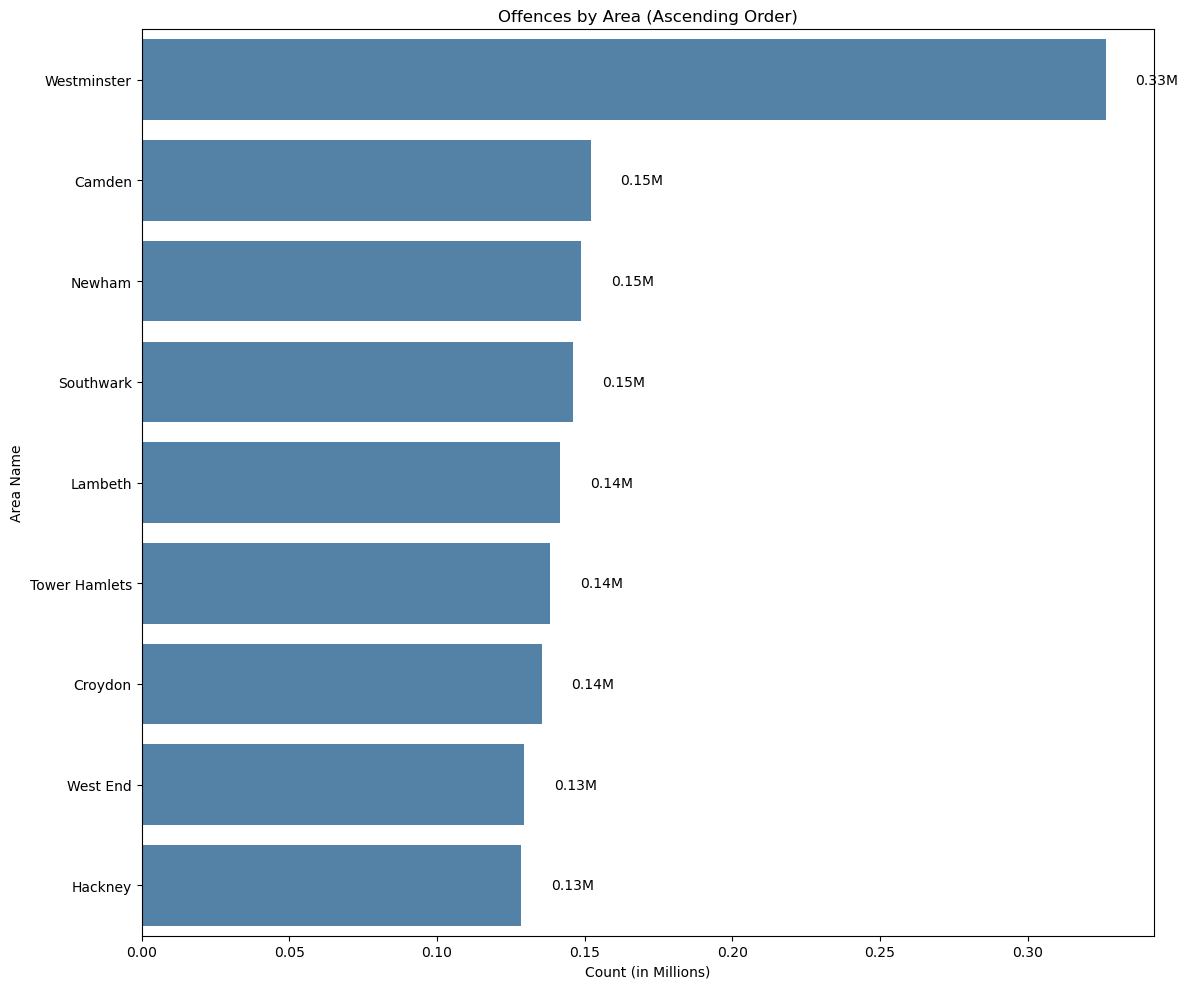

In [451]:
# Group and sort offences
offences = df[df['Measure'] == 'Offences'].groupby('Area name')['Count'].sum().sort_values(ascending=False).iloc[1:10]
offences = offences.reset_index()

offences['Count'] = offences['Count']/1000000

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(data=offences, x='Count', y='Area name', color='steelblue')
plt.title('Offences by Area (Ascending Order)')
plt.xlabel('Count (in Millions)')
plt.ylabel('Area Name')

# Add labels
for index, value in enumerate(offences['Count']):
    plt.text(value + 0.01, index, f'{value:.2f}M', va='center')

plt.tight_layout()
plt.show()


In [494]:
# Top 15 Areas by % of Positive Outcomes

C:\Users\Tesla Laptops\AppData\Local\Temp\ipykernel_17256\3708356996.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pct.head(10), x='Positive_Pct', y='Area name', palette='Greens_r')


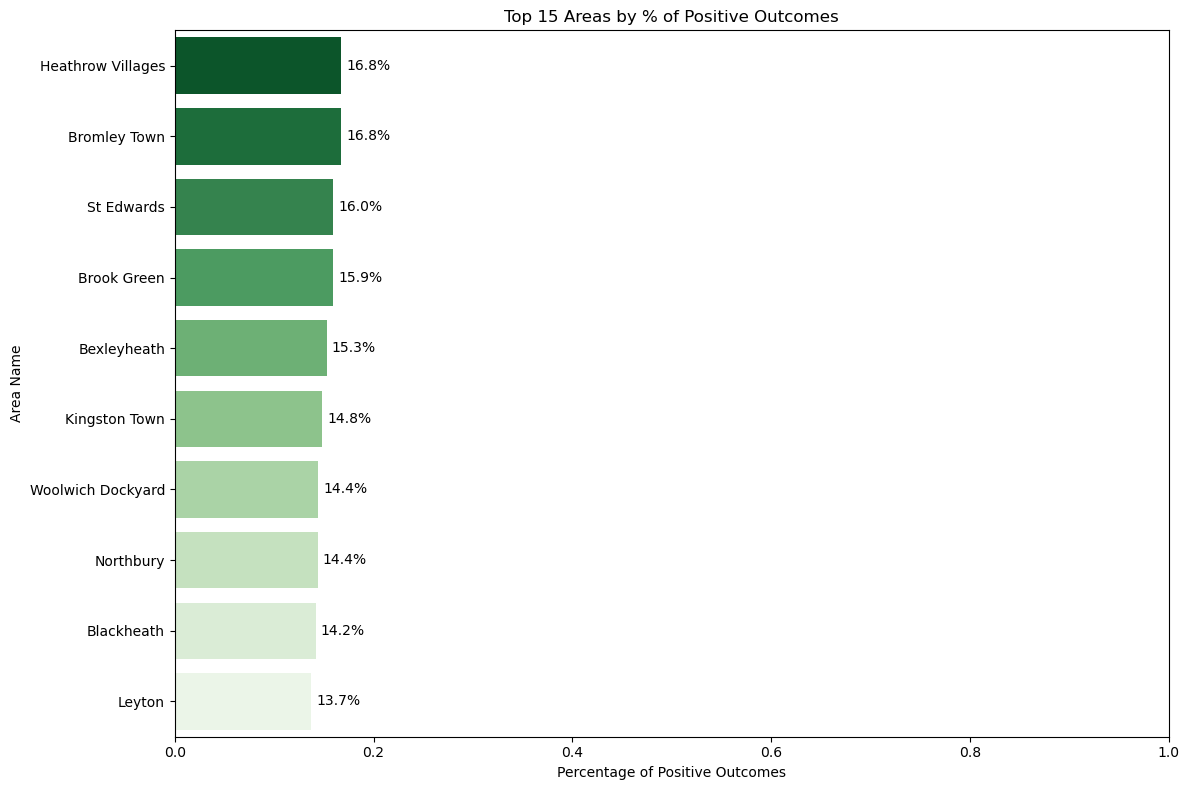

In [496]:
# Step 1: Group by Area and Measure
grouped = df.groupby(['Area name', 'Measure'])['Count'].sum().unstack().fillna(0)

# Step 2: Calculate total and percentage of positive outcomes
grouped['Total'] = grouped['Offences'] + grouped['Positive Outcomes']
grouped['Positive_Pct'] = grouped['Positive Outcomes'] / grouped['Total']

# Step 3: Sort by Positive Outcome %
top_pct = grouped.sort_values('Positive_Pct', ascending=False).reset_index()

# Step 4: Plot top 15 areas
plt.figure(figsize=(12, 8))
sns.barplot(data=top_pct.head(10), x='Positive_Pct', y='Area name', palette='Greens_r')

# Add percentage labels
for index, value in enumerate(top_pct.head(10)['Positive_Pct']):
    plt.text(value + 0.005, index, f'{value:.1%}', va='center')

# Formatting
plt.title('Top 15 Areas by % of Positive Outcomes')
plt.xlabel('Percentage of Positive Outcomes')
plt.ylabel('Area Name')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


In [447]:
# Recreate the pivot table
pivot = df.pivot_table(
    index=['Area name'],
    columns='Measure',
    values='Count',
    aggfunc='sum',
    fill_value=0
).reset_index()

# Add a column for total (sum of Offences and Positive Outcomes)
pivot['Total Count'] = pivot['Offences'] + pivot['Positive Outcomes']
pivot['% of Total PO'] = pivot['Positive Outcomes'] / pivot['Total Count'] * 100

# Sort the table by 'Total' in descending order
pivot = pivot.sort_values(by='Total Count', ascending=False)

pivot.head(5)

Measure,Area name,Offences,Positive Outcomes,Total Count,% of Total PO
467,Other / NK,330514,25604,356118,7.189752
701,Westminster,326527,22120,348647,6.344526
431,Newham,148944,15466,164410,9.406970
92,Camden,152063,10515,162578,6.467665
565,Southwark,145993,11684,157677,7.410085


In [445]:
subset = pivot[['Area name', '% of Total PO']]
subset = subset.sort_values(by='% of Total PO', ascending=False)
subset.head()

Measure,Area name,% of Total PO
301,Heathrow Villages,16.754631
78,Bromley Town,16.753066
573,St Edwards,15.960708
81,Brook Green,15.923970
48,Bexleyheath,15.280821
